<a href="https://colab.research.google.com/github/ev1025/Ticketing-Prediction/blob/main/%EB%B6%84%EC%84%9D%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 가설

## 데이터 전처리

1. membership.csv : 고객 데이터(고객번호, 나이, 직업, 좋아하는 선수)
   - zipcode와 job이 결측치이고 좋아하는 선수가 무고사인 고객이 많음
   - 회원가입시 기본 값으로 예상됨
   - zipcode의 결측치를 0으로 job의 결측치를 '기타'로 채워줌


2. reserve_ticket.csv : 티켓 판매 데이터(주문번호, 고객번호, 주문시간, 경기시간, 취소유무, 티켓번호, 예매좌석 정보)
   - 스카이라운지는 열 번호가 없어서 seat_Attribute_5 컬럼을 'sky'로 채워줌
   - 중복된 컬럼이 있어서 detail_cancel_date_time 컬럼 제거
   - 예매, 예매취소 시간이 나누어져 있어서 한 컬럼으로 합침
   - 기타 게임시간 관련 컬럼을 생성 및 추가(경기시간 datetime, 요일, 월 컬럼 추가)
   - df4에서 경기 상대 팀 정보 가져와서 merge


3. d95e264436cf42de.xlsx : 프로팀 일자별 순위
   - 2022년 경기 순위만 남기고 제거


4. schedule2022120221019212245.xml : 경기 결과(경기시간, 경기정보, 관객 수)
   - 한글 인코딩 문제가 발생하여, 디코딩 후 인코딩을 진행하고 다시 디코딩하여 문제 해결
   - 승부차기 내역이 없어서 home_team_tk, away_team_tk 컬럼 삭제
   - 게임시간 컬럼을 datetime형식으로, 요일 컬럼을 숫자로 변경

## 데이터 분석

### 요일별 시간별 경기 수

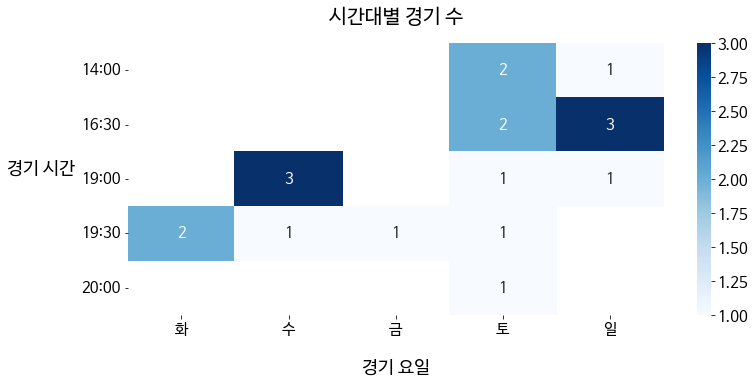   



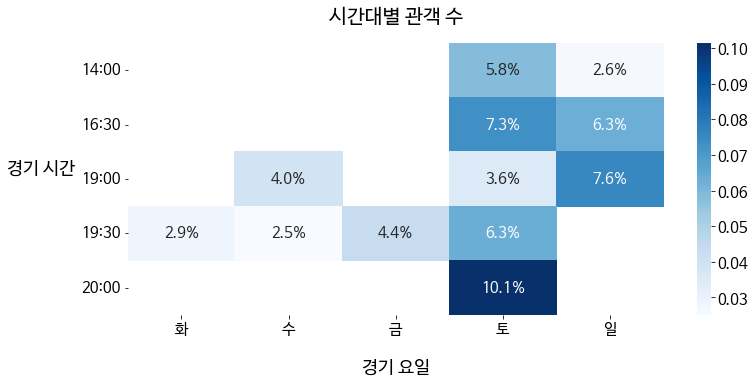

### 고객 리텐션 확인을 위한 코호트분석

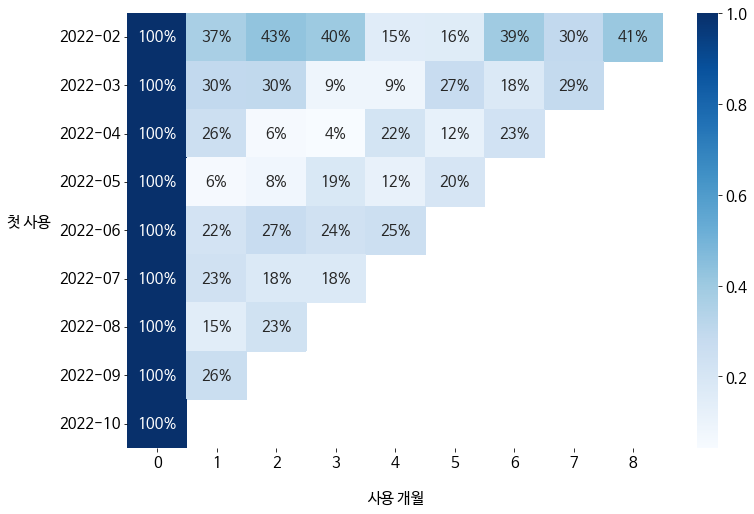

- 5~6월 코로나 이슈로 인한 방문률 감소
- 시즌 초기부터 방문하던 고객층은 높은 유지율을 보임
- 전체적으로 견조한 유지율 흐름


### 티켓 예매정보

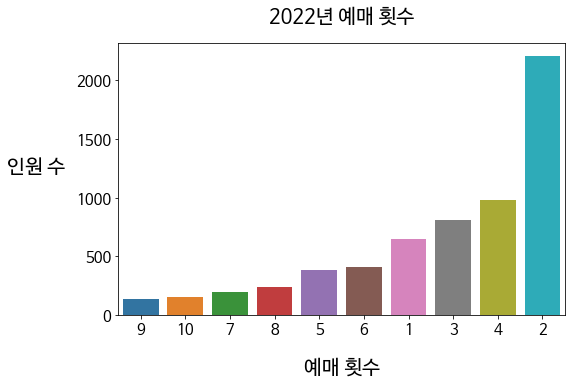



- 보통 한 시즌에 2회 예매하는 경우가 가장 많았고, 상위권이 모두 5회 미만 예매자들이었다.
- 예매횟수 5회를 기준으로 이벤트를 진행하는건 어떨까?
   - 5회 정액권 할인 판매(고급좌석 포함)
   - 5회 이상 예매 시 고급 좌석 예매 할인
   - 4회 중 2회 이상 고급좌석 예매 시 일반석 제공이나 50% 할인


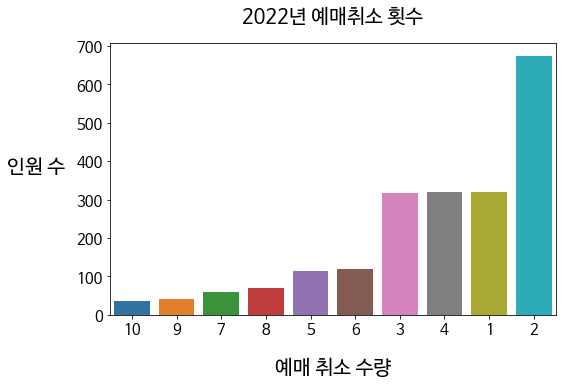

- 5회 미만 관램객에서 취소거래도 많이 나타남
- 취소하지 않도록 관리 필요!   


### 직전 경기 결과에 따른 관객 수

**전체 경기장을 확인해본 결과 직전 경기를 이긴 경우 더 많은 관객이 오는 것을 확인하였다.**

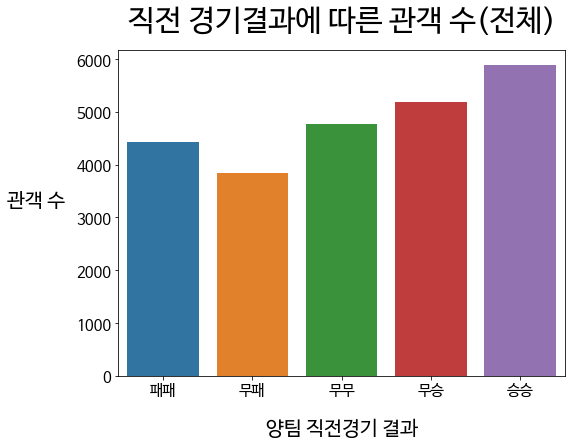

**- 인천 경기장에서는 두 팀이 직전 경기를 패배한 경우 평균적으로 관객 수가 낮았다.**

**- 두 팀 모두 승리했을 경우가 가장 높지는 않았지만 어느정도 영향은 있어보인다.**


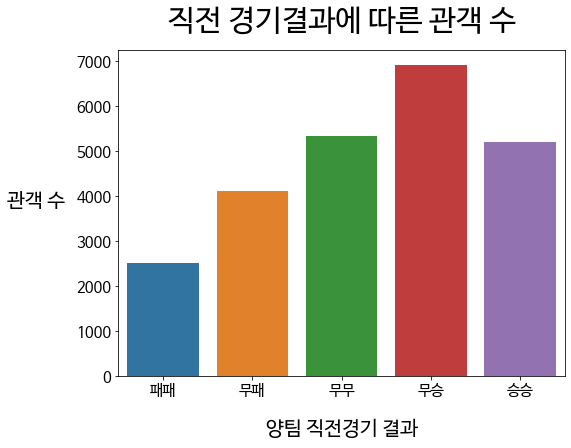

**- 인천경기장의 팀별 직전경기 결과 점수의 합계**

**- 직전 경기를 (승리 : 1점 / 무승부 : 0점 /  패배 : -1점)**

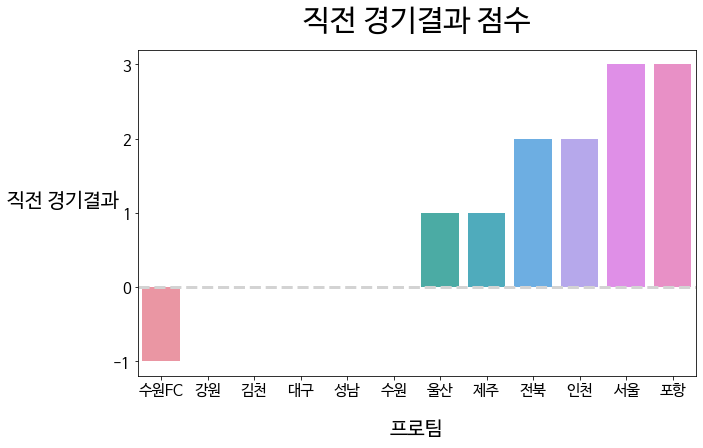

**- 위의 점수가 높을수록 관람객이 많을까?**

**- 확인 결과 직전경기 결과가 좋은 팀들이 평균 관객수도 높은 편이다.**

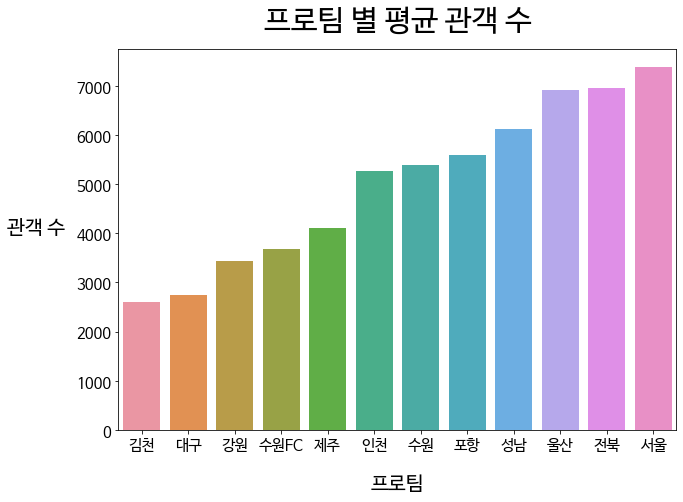


**- 평균적으로 홈경기 관람객이 원정경기 관람객보다 많았다.**

**- 모든 경기장이 이런지 비율을 확인해봤다.**

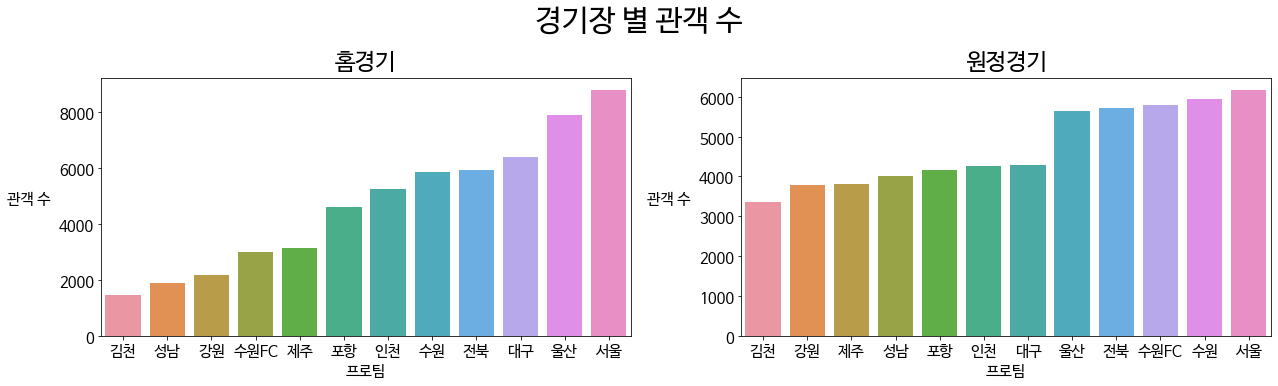

**- 확인 결과, 인천경기장은 홈경기 관객 비중이 높은편이다.**

**- 관객 비율 = 원정경기 평균관객수 / 홈경기 평균 관객 수**

**- 따라서 현재 홈경기 관중을 위한 할인이벤트에 더 주력해야한다.**

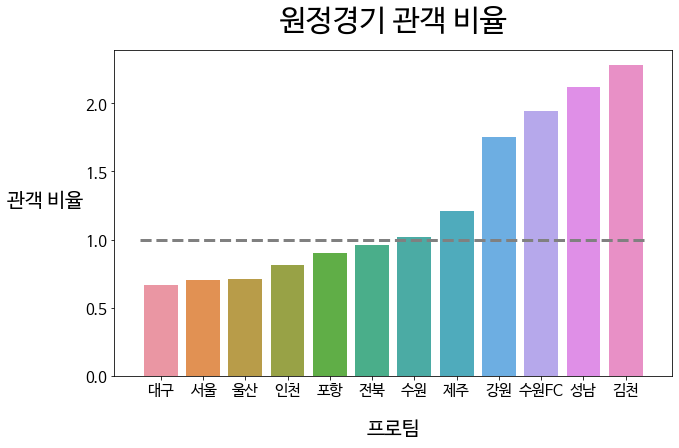

### ㅇㅇㅇ